<a href="https://colab.research.google.com/github/Q-ninja/Binuyo/blob/master/MATH_6373_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['Thyroid.csv']))

Saving Thyroid.csv to Thyroid.csv


In [0]:
# Initial Class Size
class1 = df.loc[df['Class']==1]
len(class1) # Initial size of class 1 = 166
class2 = df.loc[df['Class']==2]
len(class2) # Initial size of class 2 = 368
class3 = df.loc[df['Class']==3]
len(class3) # Initial size of class 3 = 6666

# New class sizes (N = 10000)
C1 = class1.append([class1]*20, ignore_index=True)
len(C1) # New size of class 1 = 3320
C2 = class2.append([class2]*9, ignore_index=True)
len(C2) # New size of class 2 = 3312
C3 = class3.iloc[:3368] # New size of class 3 = 3368
dataset = C1.append(C2)
dataSet = dataset.append(C3)

# Training Set
C1_train = C1.iloc[:2656]
C2_train = C2.iloc[:2650]
C3_train = C3.iloc[:2694]
train = C1_train.append([C2_train])
train_set = train.append([C3_train]) # For PCA analysis 
trainSet = train_set.iloc[:,0:21]
train_y = train_set.iloc[:,21:22]
C1_train = C1_train.iloc[:,0:21]
C2_train = C2_train.iloc[:,0:21]
C3_train = C3_train.iloc[:,0:21]

# Test Set
C1_test = C1.iloc[-664:]
C2_test = C2.iloc[-662:]
C3_test = C3.iloc[-674:]
test = C1_test.append([C2_test])
test_set = test.append([C3_test])
testSet = test_set.iloc[:,0:21]
test_y = test_set.iloc[:,21:22]
C1_test = C1_test.iloc[:,0:21]
C2_test = C2_test.iloc[:,0:21]
C3_test = C3_test.iloc[:,0:21]

# Response for train and test set
def response(b, size):
  yy = {}
  for i in range(size):
    result=str(i)
    if b[i]==1:
      yy[result]=[1,0,0]
    elif b[i]==2:
        b[i]=[0,1,0]
        yy[result]=b[i] 
    elif b[i]==3:
        b[i]=[0,0,1]
        yy[result]=b[i] 
  yyy=pd.DataFrame.from_dict(data=yy,orient='index')
  return(yyy)

trainY = response(list(train_y["Class"]), len(train_y))
testY = response(list(test_y["Class"]), len(test_y))

[3.5853306  1.74305115 0.01959    0.26586354 0.33618282 0.50998603
 0.68245381 1.22856578 1.13896855 1.13391038 1.09929259 1.03444702
 1.0151233  0.82984074 0.99280702 0.98108439 0.94893354 0.86989373
 0.86482662 0.92285527 0.91029693 0.8866962 ]
3.5853305957664436
1.743051153521593
1.2285657849248413
1.1389685496502995
1.1339103820040535
1.0992925873796833
1.0344470230963414
1.0151232987370815
0.9928070160987751
0.9810843861115303
0.9489335410162381
0.9228552698361429
0.9102969304095441
0.8866962032099956
0.8698937281234898
0.8648266160921161
0.8298407400010944
0.6824538071612258
0.5099860269016286
19
[0.31095207 0.16536826 0.12149673]


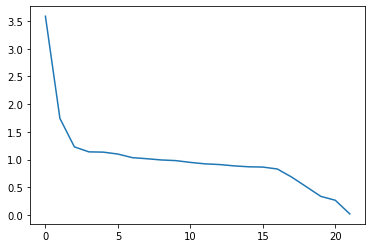

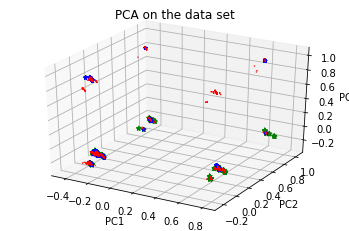

In [0]:
# PCA analysis
X1=train_set.values
from sklearn.preprocessing import StandardScaler
X1_std=StandardScaler().fit_transform(X1)
X1_std
cov_mat1=np.corrcoef(np.transpose(X1_std))

cov_mat1=np.corrcoef(np.transpose(X1_std))
eig_vals1,eig_vecs1=np.linalg.eig(cov_mat1)
print(eig_vals1)
plt.figure(1)
L1=sorted(eig_vals1,reverse=True)
plt.plot(L1)
compare1=sum(L1)*0.95 # The largest eigenvalues preserves 95% of the total sum of the eigenvalues
s1=0
count1=0
for i in L1:
    count1=count1+1
    s1=s1+i
    print(i)
    if s1>compare1:
        print(count1)
        break
h95=count1

# Convert response variable to categorical variable 
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
train_set['Class']=pd.Categorical(train_set['Class'])
my_color=train_set['Class'].cat.codes

# PrincipalComponents = pca.fit_transform(X1)
pca = PCA(n_components=3)
pca.fit(trainSet)
 
# Store results of PCA in a data frame
result1=pd.DataFrame(pca.transform(C1_train), columns=['PCA%i' % i for i in range(3)], index=C1_train.index)
result2=pd.DataFrame(pca.transform(C2_train), columns=['PCA%i' % i for i in range(3)], index=C2_train.index)
result3=pd.DataFrame(pca.transform(C3_train), columns=['PCA%i' % i for i in range(3)], index=C3_train.index)

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result3['PCA0'], result3['PCA1'], result3['PCA2'],c="Red", s=0.5, marker='*')
ax.scatter(result1['PCA0'], result1['PCA1'], result1['PCA2'],c='Blue', s=10, marker='*')
ax.scatter(result2['PCA0'], result2['PCA1'], result2['PCA2'],c="Green", s=20, marker='*' )

# Label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the data set")

# Explained variance
print(pca.explained_variance_ratio_)

In [0]:
# Scale the train and test set
scaler=preprocessing.StandardScaler()
trainSet=pd.DataFrame(scaler.fit_transform(trainSet))
testSet=pd.DataFrame(scaler.fit_transform(testSet))
a=testY.values
b=[sum(x) for x in zip(*a)]
print(b) # Test set

[664, 662, 674]


In [0]:
# MLP architecture
import math
training_epochs=1000
batch_size=1000
display_step=1

global_step=tf.Variable(0,trainable=False)
initial_learning_rate=0.1
learning_rate=tf.train.exponential_decay(initial_learning_rate,global_step=global_step,decay_steps=training_epochs,decay_rate=0.9)
add_global=global_step.assign_add(1)

n_hidden=60 # h95=19; hL=60
n_input=21 
n_classes=3
d=math.sqrt(60*21+60+60*3+3)

In [0]:
# tf graph input
X=tf.placeholder("float",[None, n_input])
Y=tf.placeholder("float",[None, n_classes])

# Store layers, weight, & bias
weights={
        'h': tf.Variable(tf.random_normal([n_input,n_hidden])),
        'out':tf.Variable(tf.random_normal([n_hidden,n_classes]))
        }

biases={
        'b':tf.Variable(tf.random_normal([n_hidden])),
        'out':tf.Variable(tf.random_normal([n_classes]))
        }

def MLP(x):
    layer_1=tf.add(tf.matmul(x,weights['h']), biases['b']) # Hidden Layer Pt 1
    layer_1=tf.nn.relu(layer_1) # Hidden Layer Pt 2 (Uses RELU activation function)
    out_layer=tf.matmul(layer_1, weights['out'])+biases['out']
    return out_layer

# Construct model
logits=MLP(X)

# Define loss and optimizer
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=logits))
optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
correct_prediction=tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
confusion_matrix=tf.math.confusion_matrix(tf.argmax(logits,1),tf.argmax(Y,1))
init=tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



[[2656    0    5]
 [   0 2650   37]
 [   0    0 2652]]
[[664   0   8]
 [  0 662  25]
 [  0   0 641]]


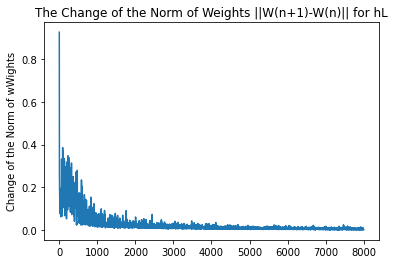

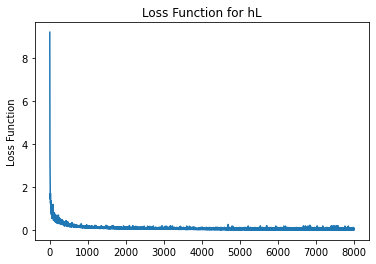

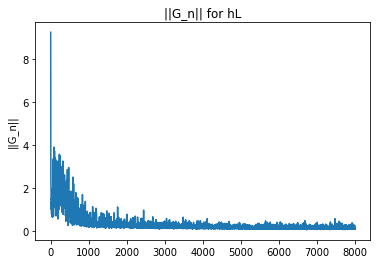

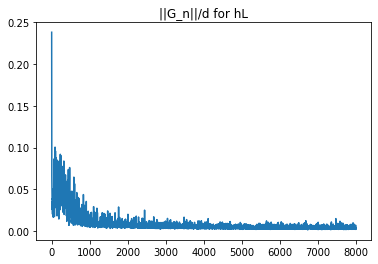

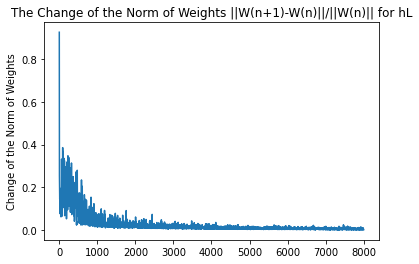

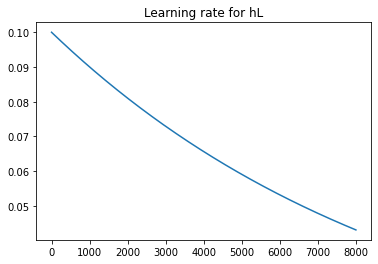

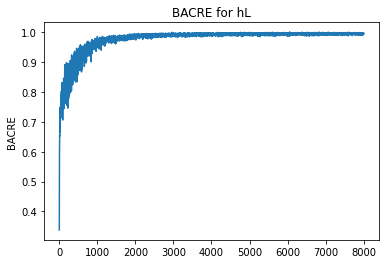

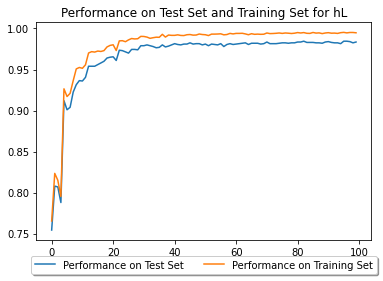

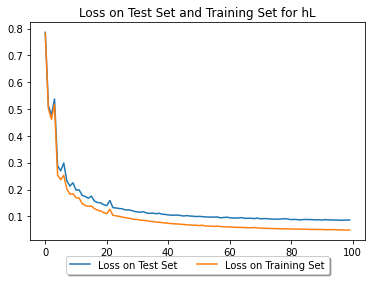

In [0]:
#Initializing the variables
with tf.Session() as sess:
    sess.run(init)
    ini_acu=sess.run(accuracy,feed_dict={X:trainSet,Y:trainY})
    train_per1=[]
    test_per1=[]
    train1=[]
    test1=[]
    L_R1=[]
    LOSS1=[]
    W_n1=[]
    relW=[]
    G_n1=[]
    G_ave1=[]
    BACRE1=[]
    ACRE1=[]
    #Training cycle
    for epoch in range(training_epochs):
        avg_cost=0
        total_batch=int(trainSet.shape[0]/batch_size)
        store=np.append(np.reshape(sess.run(weights['h']),(1,n_hidden*n_input)),np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden)))
        store=np.append(store,np.reshape(sess.run(biases['b']),(1,n_hidden)))
        store=np.append(store,np.reshape(sess.run(biases['out']),(1,n_classes)))
        for i in range(total_batch):
            step,rate=sess.run([add_global,learning_rate])
            L_R1.append(rate)
            randidx=np.random.randint(8000,size=batch_size)
            batch_xs=trainSet.iloc[randidx,:]
            batch_ys=trainY.iloc[randidx,:]
            sess.run(optimizer,feed_dict={X:batch_xs,Y:batch_ys})
            c = sess.run(loss,feed_dict={X:batch_xs,Y:batch_ys})
            BACRE1.append(sess.run(accuracy,feed_dict={X:batch_xs,Y:batch_ys}))
            LOSS1.append(c)
            W1=np.reshape(sess.run(weights['h']),(1,n_hidden*n_input))
            W2=np.reshape(sess.run(weights['out']),(1,n_classes*n_hidden))
            W3=np.reshape(sess.run(biases['b']),(1,n_hidden))
            W4=np.reshape(sess.run(biases['out']),(1,n_classes))
            W=np.concatenate((W1,W2,W3,W4),axis=1)
            WW=LA.norm(W-store)
            relW.append(WW/(LA.norm(store)))
            W_n1.append(WW)
            G_n1.append(WW/rate)
            G_ave1.append(WW/(rate*d))
            store=W
            avg_cost+=c/total_batch
            if step%80==0:
               train_loss=sess.run(accuracy,feed_dict={X:trainSet,Y:trainY})
               train_per1.append(train_loss)
               testper=sess.run(accuracy,feed_dict={X:testSet,Y:testY})
               test_per1.append(testper)
               train1.append(sess.run(loss,feed_dict={X:trainSet,Y:trainY}))
               test1.append(sess.run(loss,feed_dict={X:testSet,Y:testY})) 
       
    # Confusion matrices
    print(sess.run(confusion_matrix,feed_dict={X:trainSet,Y:trainY}))   
    print(sess.run(confusion_matrix,feed_dict={X:testSet,Y:testY}))
    # Hidden Layer Activity
    weight = sess.run(weights["h"])
    bias = sess.run(biases["b"])

plt.figure(1)
plt.plot(W_n1)
plt.ylabel('Change of the Norm of wWights')
plt.title('The Change of the Norm of Weights ||W(n+1)-W(n)|| for hL')
plt.figure(2)
plt.plot(LOSS1)
plt.ylabel('Loss Function')
plt.title('Loss Function for hL')
plt.figure(3)
plt.plot(G_n1)
plt.ylabel('||G_n||')
plt.title('||G_n|| for hL')
plt.figure(4)
plt.plot(G_ave1)
plt.title('||G_n||/d for hL')
plt.figure(5)
plt.plot(W_n1)
plt.ylabel('Change of the Norm of Weights')
plt.title('The Change of the Norm of Weights ||W(n+1)-W(n)||/||W(n)|| for hL')
plt.figure(6)
plt.plot(L_R1)
plt.title('Learning rate for hL')

plt.figure(7)
plt.plot(BACRE1)
plt.ylabel('BACRE')
plt.title('BACRE for hL')

x = np.arange(100)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, test_per1, label='Performance on Test Set')
ax.plot(x, train_per1, label='Performance on Training Set')
plt.title('Performance on Test Set and Training Set for hL')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
plt.show()

x = np.arange(100)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, test1, label='Loss on Test Set')
ax.plot(x, train1, label='Loss on Training Set')
plt.title('Loss on Test Set and Training Set for hL')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),shadow=True, ncol=2)
plt.show()   

In [0]:
# Hidden Layer 
trainSet = pd.DataFrame(trainSet).to_numpy()
hiddenLayer = np.matmul(trainSet, weight) + bias
def relu(X):
   return np.maximum(0,X)
hiddenLayer = relu(hiddenLayer)

[9.90756134 7.18170902 4.68662607 4.35874188 3.60272548 3.237054
 2.99686453 2.66104864 2.47420945 2.20820984 2.18929269 1.96865443
 1.66110556 1.42484523 1.29101093 1.10081039 0.93985616 0.83482877
 0.67579921 0.64648992 0.4956162  0.32442418 0.3131331  0.28129499
 0.25627785 0.23806015 0.17854078 0.15902092 0.14448755 0.13005423
 0.11592908 0.10846295 0.10553567 0.09205633 0.08305254 0.07366332
 0.06988502 0.06321622 0.06153252 0.05672999 0.01014572 0.05299763
 0.013148   0.01481327 0.01553479 0.01682257 0.01896744 0.01952526
 0.02276703 0.04940692 0.0469722  0.02780701 0.02901618 0.03181642
 0.03331972 0.03435481 0.04411889 0.04213061 0.03954058 0.03837783]
[0.19566518 0.12901488 0.08005213]


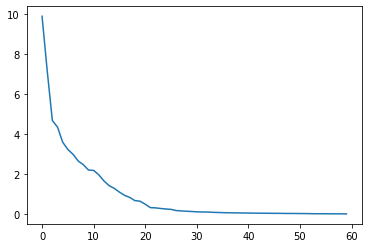

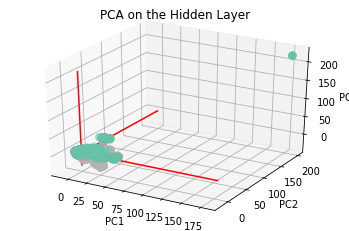

In [0]:
# PCA Analysis on Hidden Layer 
df = pd.DataFrame(hiddenLayer)
pca = PCA(n_components=3)
pca.fit(df)
result = pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)], index=df.index)

# Plot the 60 eigenvalues
hidden=df.values
hidden_std=StandardScaler().fit_transform(hidden)
hidden_std
cov_mat2=np.corrcoef(np.transpose(hidden_std))
cov_mat2=np.corrcoef(np.transpose(hidden_std))
eig_vals2,eig_vecs2=np.linalg.eig(cov_mat2)
print(eig_vals2)
plt.figure(1)
L2=sorted(eig_vals2,reverse=True)
plt.plot(L2)

# Proportion of variance
print(pca.explained_variance_ratio_)
 
# Plot initialisation
colors = ["Red", "Blue", "Green"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# Label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the Hidden Layer")
plt.show()

In [0]:
import statistics as stat
from statistics import mean
from operator import add  
classes = pd.DataFrame(train_set["Class"])
df.reset_index(drop=True, inplace=True)
classes.reset_index(drop=True, inplace=True)
data = pd.concat([df, classes], axis=1)

# Compute the average hidden neurons activity profiles
PROF1 = [0]*2656
PROF2 = [0]*2650
PROF3 = [0]*2694
for i in range(8000):
  h = data.iloc[i:i+1,0:60].values[0]
  if data.iloc[i:i+1,60:61].values[0] == 1:
    PROF1 = list(map(add, PROF1, h))
  elif data.iloc[i:i+1,60:61].values[0] == 2:
    PROF2 = list(map(add, PROF2, h))
  elif data.iloc[i:i+1,60:61].values[0] == 3:
    PROF3 = list(map(add, PROF3, h))
PROF1 = [i/2656 for i in PROF1]
PROF2 = [i/2650 for i in PROF2]
PROF3 = [i/2694 for i in PROF3]

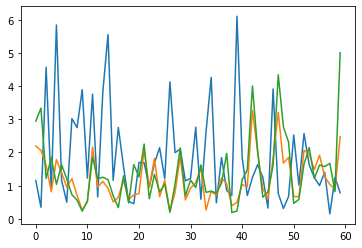

In [0]:
# Display the average hidden neurons activity profiles
plt.plot(PROF1)
plt.plot(PROF2)
plt.plot(PROF3)
plt.show()

[]

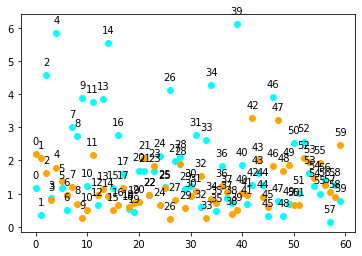

In [0]:
# C1 vs C2
points = list(range(60))
plt.plot(PROF1, "bo", color="cyan")
plt.plot(PROF2, "bo", color="orange")
for x,y in zip(points, PROF1):
    label = "{:}".format(x)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
for x,y in zip(points, PROF2):
    label = "{:}".format(x)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
plt.plot()

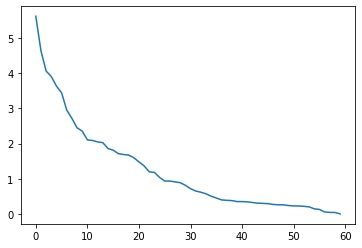

In [0]:
# Absolute difference between C1 vs C2
C1_C2 = sorted([abs(i1 - i2) for i1, i2 in zip(PROF1, PROF2)], reverse=True)
plt.plot(C1_C2)

[]

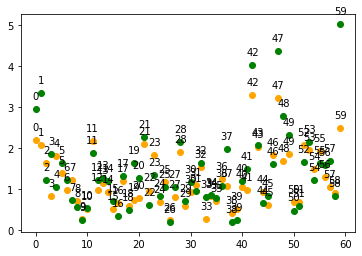

In [0]:
# C2 vs C3
plt.plot(PROF2, "bo", color="orange")
plt.plot(PROF3, "bo", color="green")
for x,y in zip(points, PROF2):
    label = "{:}".format(x)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
for x,y in zip(points, PROF3):
    label = "{:}".format(x)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
plt.plot()

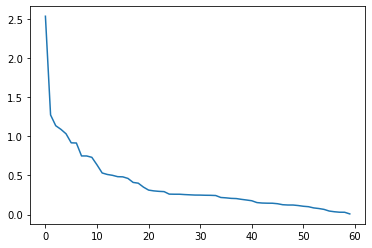

In [0]:
# Absolute difference between C2 vs C3
C2_C3 = sorted([abs(i2 - i3) for i2, i3 in zip(PROF2, PROF3)], reverse=True)
plt.plot(C2_C3)

[]

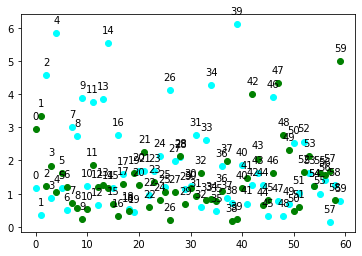

In [0]:
# C1 vs C3
plt.plot(PROF1, "bo", color="cyan")
plt.plot(PROF3, "bo", color="green")
for x,y in zip(points, PROF1):
    label = "{:}".format(x)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
for x,y in zip(points, PROF3):
    label = "{:}".format(x)
    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center') 
plt.plot()

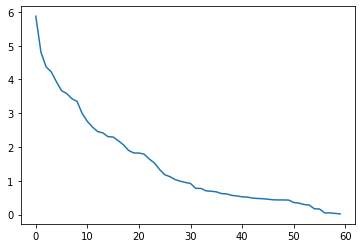

In [0]:
# Absolute difference between C1 vs C3
C1_C3 = sorted([abs(i1 - i3) for i1, i3 in zip(PROF1, PROF3)], reverse=True)
plt.plot(C1_C3)